# Notebook used for producing final processed data to go into the Report

In [174]:
import os 
from matplotlib import pyplot as plt 
import pandas as pd 
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
import glob
from astroquery.vizier import Vizier
import seaborn as sns 
from astropy.io import fits

In [3]:
# --- Plot Parameters ---- 
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["figure.dpi"] = 100
plt.rc('font', family = 'serif', serif = 'cmr10') 
plt.rcParams.update({# Use mathtext, not LaTeX
                            'text.usetex': True,
                            # Use the Computer modern font
                            'font.family': 'serif',
                            'font.serif': 'cmr10',
                            'mathtext.fontset': 'cm',
                            })
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
colour_arrays = ['red', 'blue', 'green', 'crimson', 'lime']

In [192]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

## Importing Supplementary Data

In [95]:
bossini_et_al = Vizier.get_catalogs('J/A+A/623/A108')[0]
print(bossini_et_al.keys())
bossini_dist = bossini_et_al['Dist']; 
bossini_age = 10**bossini_et_al['logA']; bossini_age_e = abs(10**bossini_et_al['E_logA'] - bossini_age)

['Cluster', 'RA_ICRS', 'DE_ICRS', 'logA', 'e_logA', 'E_logA', 'Dist', 'e_Dist', 'E_Dist', 'AV', 'e_AV', 'E_AV', 'AGTO', 'e_AGTO', 'E_AGTO', 'Fe_H', 'r_Fe_H', 'SimbadName', '_RA.icrs', '_DE.icrs']


In [65]:
siegal_et_al = Vizier.get_catalogs('J/AJ/158/35/table2')[0]
print(siegal_et_al.keys())
siegal_dist = siegal_et_al['m-M']; siegal_age = 10**siegal_et_al['log_Age_']

['Cluster', 'm-M', 'E_B-V_', 'f_E_B-V_', 'f_log_Age_', 'log_Age_', '__Fe_H_']


In [32]:
kharchenko_et_al = Vizier.get_catalogs('J/A+A/558/A53')[0]
print(kharchenko_et_al.keys())
# kharchenko_dist = kharchenko_et_al['MOD']; kharchenko_age = kharchenko_et_al['logt']

['map', 'cmd', 'stars', 'MWSC', 'Type', 'RAJ2000', 'DEJ2000', 'r0', 'r1', 'r2', 'pmRA', 'pmDE', 'RV', 'd', 'E_B-V_', 'logt', 'rc', 'rt', 'k', 'SType', '__Fe_H_', 'Simbad']


## Target Selection 

In [18]:
targets = pd.read_csv('supplementary_data/targetlist.csv')
observed = targets.loc[[np.where(targets['Group'] == 1)][0]]
proposed = targets.loc[[np.where(targets['Group'] == 2)][0]]
proposed['DistanceMod']

0    14.99
2    15.86
4    13.56
5    14.67
6    12.11
9    14.41
Name: DistanceMod, dtype: float64

In [6]:
this_work = SkyCoord(targets['RAJ2000'][np.where(targets['Group'] == 1)[0]], targets['DEJ2000'][np.where(targets['Group'] == 1)[0]], frame='fk5', unit=(u.hourangle, u.deg))
galtw = this_work.galactic

proposed =  SkyCoord(targets['RAJ2000'][np.where(targets['Group'] == 2)[0]], targets['DEJ2000'][np.where(targets['Group'] == 2)[0]], frame='fk5', unit=(u.hourangle, u.deg))
galprop = proposed.galactic

bossini_locations = SkyCoord(bossini_et_al['RA_ICRS'], bossini_et_al['DE_ICRS'], unit=(u.hourangle, u.deg))
bossini_locations = bossini_locations.galactic

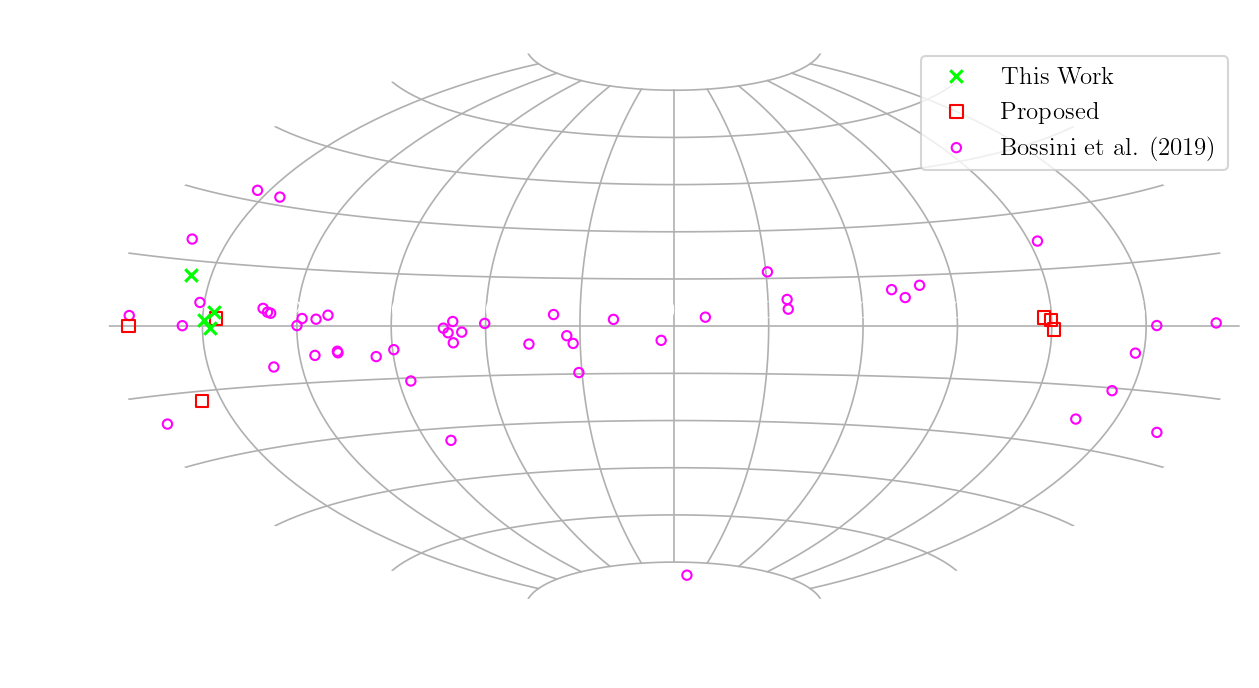

In [198]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(10,5), dpi = 150)
plt.subplot(111, projection='aitoff')

plt.scatter(galtw.l.wrap_at('180d').radian, galtw.b.radian, marker = 'x', color = 'lime', label = 'This Work', zorder = 4)
plt.scatter(galprop.l.wrap_at('180d').radian, galprop.b.radian, marker = 's', facecolor = 'None', edgecolor = 'red', label = 'Proposed', zorder = 3)
plt.scatter(bossini_locations.l.wrap_at('180d').radian, bossini_locations.b.radian, marker = 'o', facecolor = 'None', edgecolor = 'fuchsia', label = 'Bossini et al. (2019)', zorder = 2, s = 20)

plt.axhspan(np.deg2rad(-5), np.deg2rad(5), alpha=0.2, color='white')
plt.grid(True)
plt.legend(loc = 'best', prop={'size': 12})
plt.xlabel('Latitude'); plt.ylabel('Longitude')
plt.savefig('plots/target_selection.png', transparent=True)

# Log Age vs. Distance Modulus

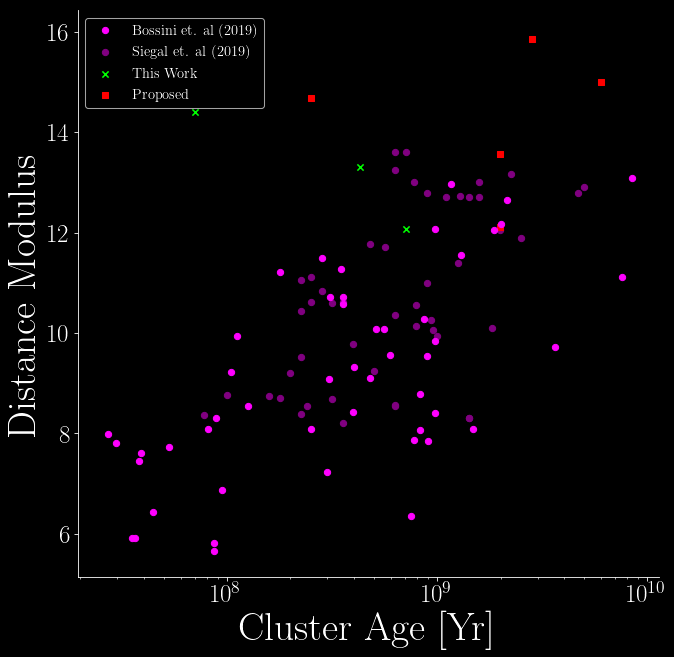

In [201]:
plt.rcParams.update({'font.size': 24})
plt.figure(figsize = (10, 10), dpi = 75)
# plt.scatter(proposed['Age'], proposed['DistanceMod'], facecolor = 'None', edgecolor = 'fuchsia', label = 'Lynga et al. (1987)', marker = 's')

plt.scatter(bossini_age, bossini_dist, label = 'Bossini et. al (2019)', color = 'fuchsia',  zorder = 3)
plt.errorbar(bossini_age, bossini_dist, xerr = bossini_age_e, ls = 'None', zorder = 0, color = 'black', label = '')

plt.scatter(siegal_age, siegal_dist, label = 'Siegal et. al (2019)', color = 'purple')

plt.scatter(10**observed['Age'], observed['DistanceMod'], color = 'lime', marker = 'x', label = 'This Work')
plt.scatter(10**proposed['Age'], proposed['DistanceMod'], color = 'red', marker = 's', label = 'Proposed')
# plt.scatter(kharchenko_age, kharchenko_dist)
plt.style.use('dark_background')
plt.legend(loc = 'best', prop={'size': 14})
plt.ylabel('Distance Modulus', fontsize = 38)
plt.xscale("log")
plt.xlabel('Cluster Age [Yr]', fontsize = 38)
plt.savefig('plots/supplementary_data_plot.png', transparent = 'True')

# Large HR-Diagram Plot

In [167]:
file_name = sorted(glob.glob('supplementary_data/Proposed_Stars_CCD_data/*.txt')); print(file_name)
label_names = ['Berkeley 20', 'Berkeley 34', 'NGC 2129', 'King 1', 'King 15', 'Stock 18']
ages = (10**np.array([9.78, 9.45, 9.345, 9.3, 8.4, 6.78]))/10**6 
color_palette = sns.color_palette("plasma")

print(proposed)

['supplementary_data/Proposed_Stars_CCD_data/Berkeley20.txt', 'supplementary_data/Proposed_Stars_CCD_data/Berkeley34.txt', 'supplementary_data/Proposed_Stars_CCD_data/NGC2129.txt', 'supplementary_data/Proposed_Stars_CCD_data/king1.txt', 'supplementary_data/Proposed_Stars_CCD_data/king15.txt', 'supplementary_data/Proposed_Stars_CCD_data/stock18.txt']
         Name     RAJ2000    DEJ2000   Age  DistanceMod  Group
0  Berkeley 20   05 33 00   00 13 00  9.78        14.99      2
2  Berkeley 34   07 00 24  -00 15 00  9.45        15.86      2
4       King 1   00 22 04    64 22 5  9.30        13.56      2
5      King 15   00 32 54   61 52 00  8.40        14.67      2
6     NGC 2129  06 00 41    23 19 06  9.30        12.11      2
9     Stock 18   00 01 37    64 37 3  6.78        14.41      2


(2, 276)
(2, 1106)
(2, 674)
(2, 4250)
(2, 3595)
(2, 1348)


Text(0, 0.4, 'She drives')

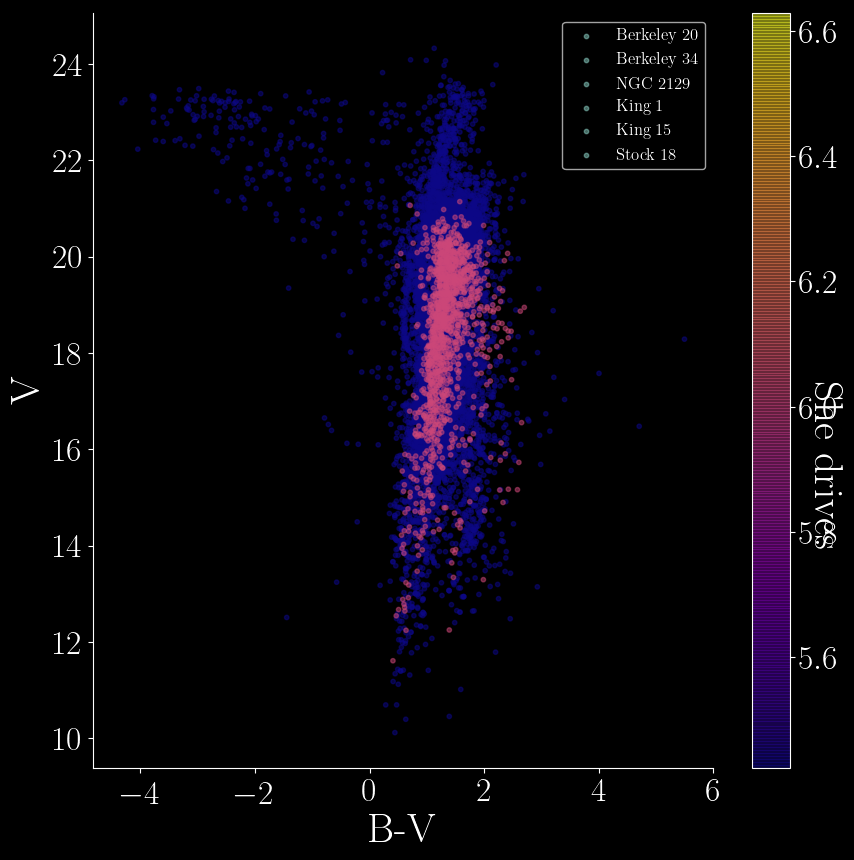

In [202]:
fig, ax = plt.subplots()

for i in range(0, len(file_name)):
    V_webda, BV_webda = np.loadtxt(file_name[i], usecols=(2,3), skiprows=1, unpack=True)
    print(np.shape([V_webda, BV_webda]))

    plt.scatter(BV_webda, V_webda, s = 10, alpha=0.5, cmap = 'plasma', label = label_names[i], c = (np.full(len(V_webda), ages[i])))

cbar = plt.colorbar()
plt.xlabel('B-V'); plt.ylabel('V')
plt.legend(prop={'size': 12})
cbar.ax.set_ylabel('She drives', rotation=270, y = 0.4)


In [208]:
cal_mags_fnames = sorted(glob.glob('calibrated_mags/*csv'))

cal_data = pd.read_csv(cal_mags_fnames[0])

(2, 276)
(2, 1106)
(2, 674)
(2, 4250)
(2, 3595)
(2, 1348)


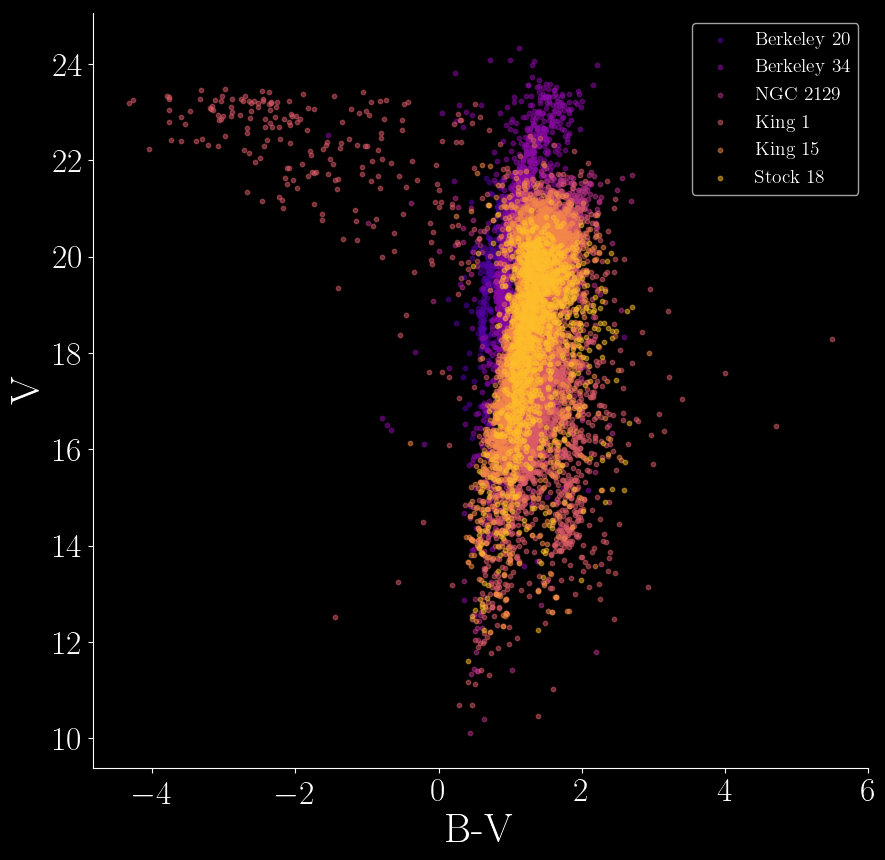

In [203]:
fig, ax = plt.subplots()

for i in range(0, len(file_name)):
    V_webda, BV_webda = np.loadtxt(file_name[i], usecols=(2,3), skiprows=1, unpack=True)
    print(np.shape([V_webda, BV_webda]))

    plt.scatter(BV_webda, V_webda, s = 10, alpha=0.5, label = label_names[i], color = color_palette[i])

plt.xlabel('B-V'); plt.ylabel('V')
plt.legend(prop={'size': 14})


# Cluster Age Distribution 

(array([27.,  9.,  6.,  2.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([2.70395836e+07, 4.48327027e+08, 8.69614470e+08, 1.29090191e+09,
        1.71218936e+09, 2.13347680e+09, 2.55476424e+09, 2.97605169e+09,
        3.39733913e+09, 3.81862657e+09, 4.23991402e+09, 4.66120146e+09,
        5.08248890e+09, 5.50377635e+09, 5.92506379e+09, 6.34635123e+09,
        6.76763868e+09, 7.18892612e+09, 7.61021356e+09, 8.03150101e+09,
        8.45278845e+09]),
 <a list of 20 Patch objects>)

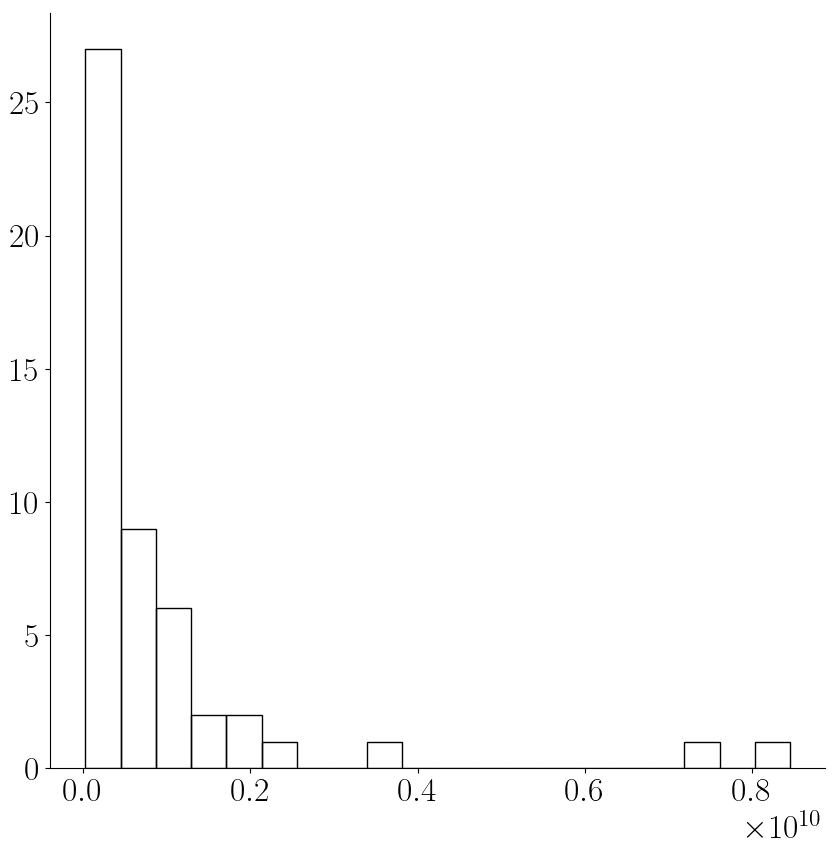

In [80]:
plt.hist(bossini_age, bins = 20, facecolor = 'None', edgecolor = 'black')
# plt.xscale('log')

# Age vs. Distance to the Galactic Plane 

# Galactocentric radius vs. Age in Gyr 

# Fe/H vs. Galactocentric Radius 

# Reddening vs. Galactocentric Radius 

# Plotting Images

['berkeley28_B_wcs.fits', 'NGC2324_B_wcs.fits', 'berkeley28_V_wcs.fits', '.DS_Store', '.thumbs', 'NGC2324_V_wcs.fits', 'NGC2355_B_wcs.fits', 'NGC2355_V_wcs.fits', 'Bochum2_V_wcs.fits', 'Bochum2_B_wcs.fits']


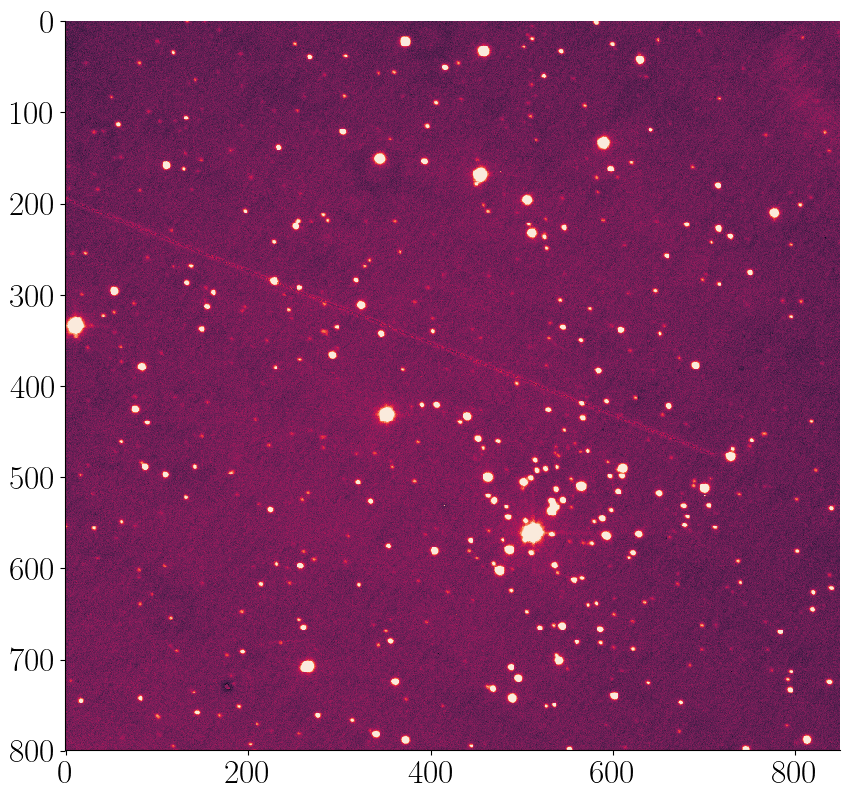

In [189]:
files = os.listdir('astrometric_obs_data')
print(files)

data = fits.getdata('astrometric_obs_data/' + files[0])

plt.imshow(data, cmap = 'rocket', vmin = 770, vmax = 800)